In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
nan = ['NA','N/A','Na','N/a','na','n/a',np.nan]

df_train = pd.read_csv(r"train.csv",na_values=nan)
df_test = pd.read_csv(r"test.csv",na_values=nan)


In [3]:
df = pd.concat([df_train, df_test],ignore_index=True)

In [4]:
df.shape

(2919, 81)

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5       2003  \
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ       706.0          Unf         0.0      150.0        856.0  \
1          ALQ       978.0          Unf         0.0      284.0       1262.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr       856       854             0  \
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710           1.0           0.0         2         1             3  \
1       1262           0.0           1.0         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0         NaN  \
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual   
0     Attchd       2003.0          RFn         2.0       548.0         TA  \
1     Attchd       1976.0          RFn         2.0       460.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch   
0         TA          Y           0           61              0          0  \
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold   
0            0         0    NaN   NaN         NaN        0       2    2008  \
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal   208500.0  
1       WD        Normal   181500.0

In [7]:
df = df.drop(columns='Id',axis =1)

In [8]:
df.shape

(2919, 80)

In [9]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond   
count  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000  \
mean     57.137718    69.305795   10168.114080     6.089072     5.564577   
std      42.517628    23.344905    7886.996359     1.409947     1.113131   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7478.000000     5.000000     5.000000   
50%      50.000000    68.000000    9453.000000     6.000000     5.000000   
75%      70.000000    80.000000   11570.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2   
count  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000  \
mean   1971.312778   1984.264474   102.201312   441.423235    49.582248   
std      30.291442     20.894344   179.334253   455.610826   169.205611   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1993.000000     0.000000   368.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   733.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF   
count  2918.000000  2918.000000  2919.000000  2919.000000   2919.000000  \
mean    560.772104  1051.777587  1159.581706   336.483727      4.694416   
std     439.543659   440.766258   392.362079   428.701456     46.396825   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     220.000000   793.000000   876.000000     0.000000      0.000000   
50%     467.000000   989.500000  1082.000000     0.000000      0.000000   
75%     805.500000  1302.000000  1387.500000   704.000000      0.000000   
max    2336.000000  6110.000000  5095.000000  2065.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath   
count  2919.000000   2917.000000   2917.000000  2919.000000  2919.000000  \
mean   1500.759849      0.429894      0.061364     1.568003     0.380267   
std     506.051045      0.524736      0.245687     0.552969     0.502872   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1126.000000      0.000000      0.000000     1.000000     0.000000   
50%    1444.000000      0.000000      0.000000     2.000000     0.000000   
75%    1743.500000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   
count   2919.000000   2919.000000   2919.000000  2919.000000  2760.000000  \
mean       2.860226      1.044536      6.451524     0.597122  1978.113406   
std        0.822693      0.214462      1.569379     0.646129    25.574285   
min        0.000000      0.000000      2.000000     0.000000  1895.000000   
25%        2.000000      1.000000      5.000000     0.000000  1960.000000   
50%        3.000000      1.000000      6.000000     1.000000  1979.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     15.000000     4.000000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch   
count  2918.000000  2918.000000  2919.000000  2919.000000    2919.000000  \
mean      1.766621   472.874572    93.709832    47.486811      23.098321   
std       0.761624   215.394815   126.526589    67.575493      64.244246   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   320.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    26.000000       0.000000   
75%       2.000000   576.000000   168.000000    70.000000   

In [10]:
df.isnull().sum()/df.shape[0] *100

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

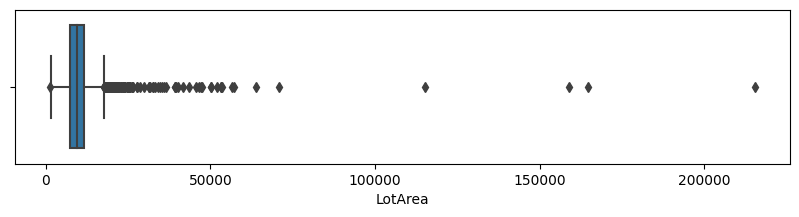

In [11]:
plt.figure(figsize=(10,2))
sb.boxplot(x="LotArea",data=df)
plt.show()

In [12]:
#df = df[~df.index.duplicated()]

In [13]:
df['LotArea'] = df['LotArea'][df['LotArea'] < 8000]

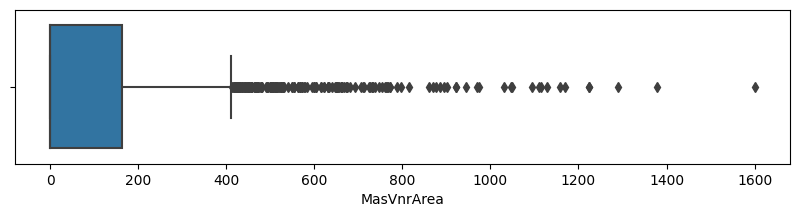

In [14]:
plt.figure(figsize=(10,2))
sb.boxplot(x="MasVnrArea",data=df)
plt.show()

In [15]:
df['MasVnrArea'] = df['MasVnrArea'][df['MasVnrArea'] < 800]

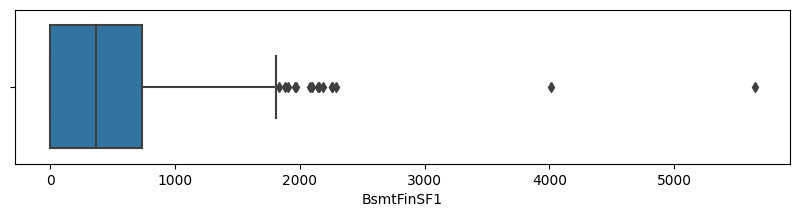

In [16]:
plt.figure(figsize=(10,2))
sb.boxplot(x="BsmtFinSF1",data=df)
plt.show()

In [17]:
df['BsmtFinSF1'] = df['BsmtFinSF1'][df['BsmtFinSF1'] < 2000]

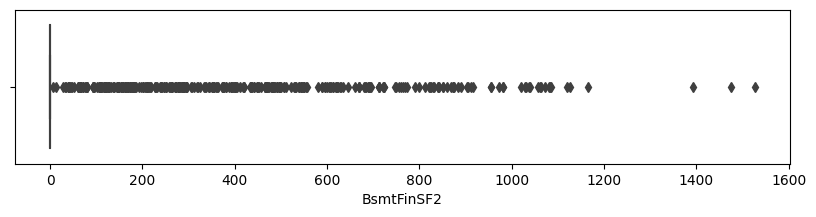

In [18]:
plt.figure(figsize=(10,2))
sb.boxplot(x="BsmtFinSF2",data=df)
plt.show()

In [19]:
df['BsmtFinSF2'] = df['BsmtFinSF2'][df['BsmtFinSF2'] < 400]

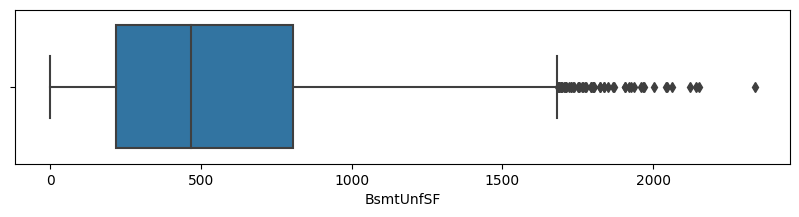

In [20]:
plt.figure(figsize=(10,2))
sb.boxplot(x="BsmtUnfSF",data=df)
plt.show()

In [21]:
df['BsmtUnfSF'] = df['BsmtUnfSF'][df['BsmtUnfSF'] < 1700]

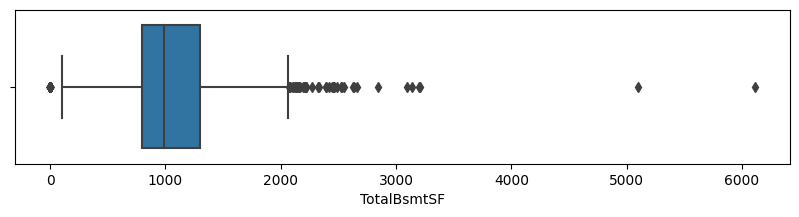

In [22]:
plt.figure(figsize=(10,2))
sb.boxplot(x="TotalBsmtSF",data=df)
plt.show()

In [23]:
df['TotalBsmtSF'] = df['TotalBsmtSF'][df['TotalBsmtSF'] < 2500]

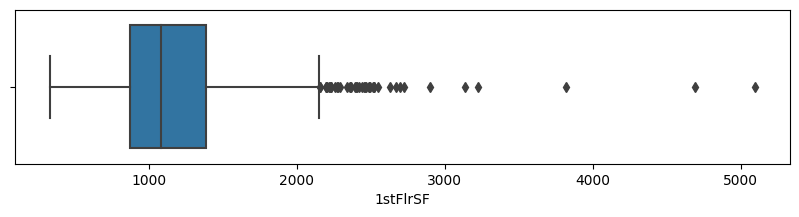

In [24]:
plt.figure(figsize=(10,2))
sb.boxplot(x="1stFlrSF",data=df)
plt.show()

In [25]:
df['1stFlrSF'] = df['1stFlrSF'][df['1stFlrSF'] < 2500]

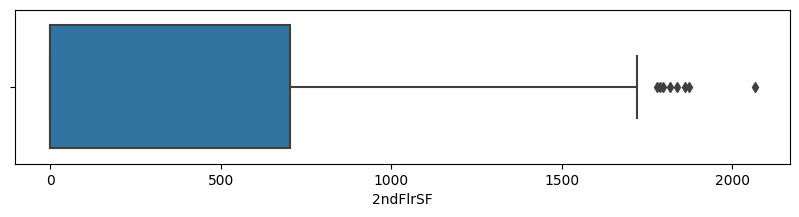

In [26]:
plt.figure(figsize=(10,2))
sb.boxplot(x="2ndFlrSF",data=df)
plt.show()

In [27]:
df['2ndFlrSF'] = df['2ndFlrSF'][df['2ndFlrSF'] < 1800]

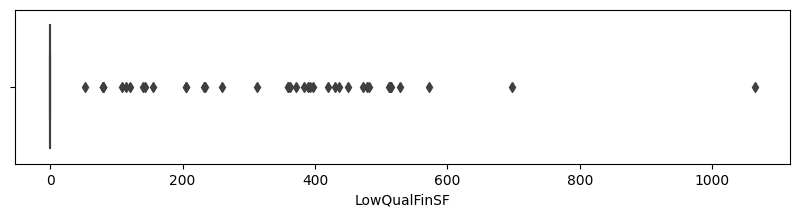

In [28]:
plt.figure(figsize=(10,2))
sb.boxplot(x="LowQualFinSF",data=df)
plt.show()

In [29]:
df['LowQualFinSF'] = df['LowQualFinSF'][df['LowQualFinSF'] < 300]

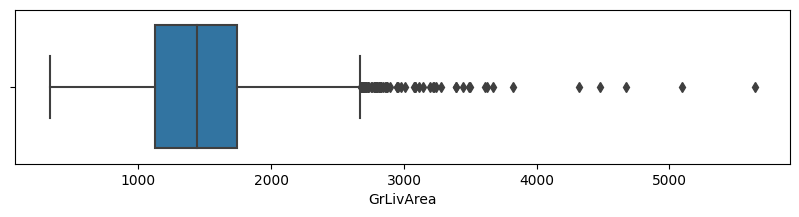

In [30]:
plt.figure(figsize=(10,2))
sb.boxplot(x="GrLivArea",data=df)
plt.show()

In [31]:
df['GrLivArea'] = df['GrLivArea'][df['GrLivArea'] < 3000]

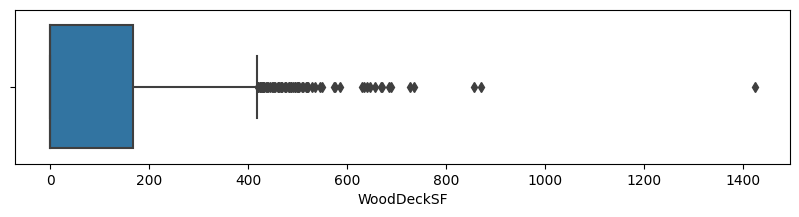

In [32]:
plt.figure(figsize=(10,2))
sb.boxplot(x="WoodDeckSF",data=df)
plt.show()

In [33]:
df['WoodDeckSF'] = df['WoodDeckSF'][df['WoodDeckSF'] < 600]

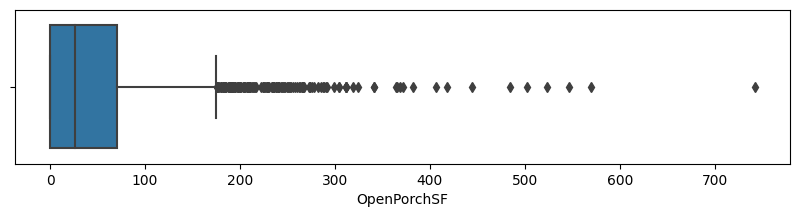

In [34]:
plt.figure(figsize=(10,2))
sb.boxplot(x="OpenPorchSF",data=df)
plt.show()

In [35]:
df['OpenPorchSF'] = df['OpenPorchSF'][df['OpenPorchSF'] < 400]

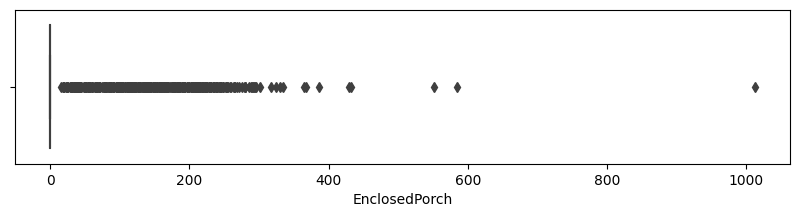

In [36]:
plt.figure(figsize=(10,2))
sb.boxplot(x="EnclosedPorch",data=df)
plt.show()

In [37]:
df['EnclosedPorch'] = df['EnclosedPorch'][df['EnclosedPorch'] < 300]

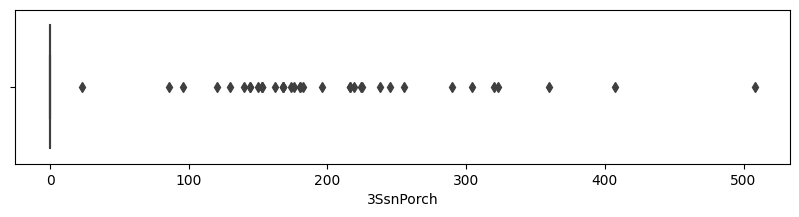

In [38]:
plt.figure(figsize=(10,2))
sb.boxplot(x="3SsnPorch",data=df)
plt.show()

In [39]:
df['3SsnPorch'] = df['3SsnPorch'][df['3SsnPorch'] < 250]

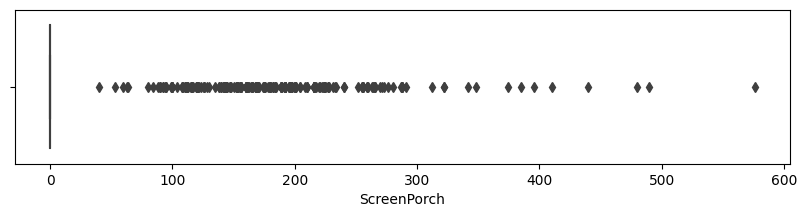

In [40]:
plt.figure(figsize=(10,2))
sb.boxplot(x="ScreenPorch",data=df)
plt.show()

In [41]:
df['ScreenPorch'] = df['ScreenPorch'][df['ScreenPorch'] < 300]

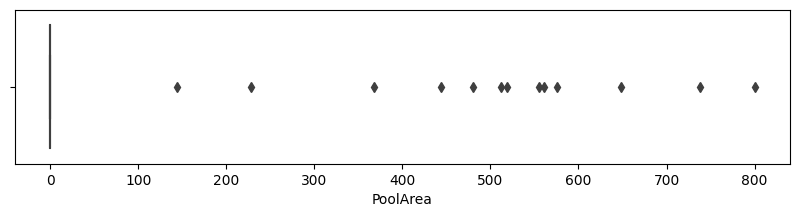

In [42]:
plt.figure(figsize=(10,2))
sb.boxplot(x="PoolArea",data=df)
plt.show()

In [43]:
df['PoolArea'] = df['PoolArea'][df['PoolArea'] < 600]

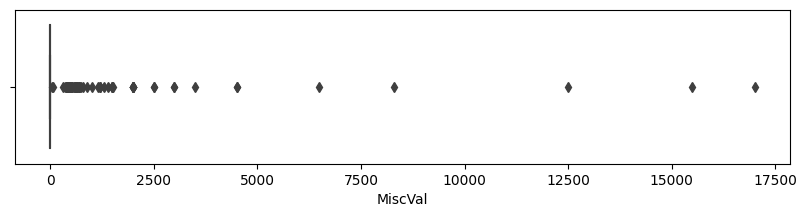

In [44]:
plt.figure(figsize=(10,2))
sb.boxplot(x="MiscVal",data=df)
plt.show()

In [45]:
df['MiscVal'] = df['MiscVal'][df['MiscVal'] < 1300]

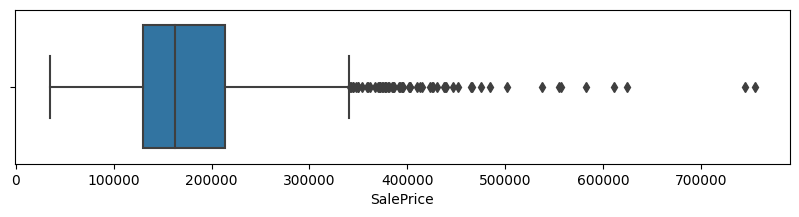

In [46]:
plt.figure(figsize=(10,2))
sb.boxplot(x="SalePrice",data=df)
plt.show()

In [47]:
df.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond   
count  2919.000000  2433.000000   881.000000  2919.000000  2919.000000  \
mean     57.137718    69.305795  5582.942111     6.089072     5.564577   
std      42.517628    23.344905  1932.891177     1.409947     1.113131   
min      20.000000    21.000000  1300.000000     1.000000     1.000000   
25%      20.000000    59.000000  4060.000000     5.000000     5.000000   
50%      50.000000    68.000000  6120.000000     6.000000     5.000000   
75%      70.000000    80.000000  7200.000000     7.000000     6.000000   
max     190.000000   313.000000  7993.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2   
count  2919.000000   2919.000000  2870.000000  2908.000000  2762.000000  \
mean   1971.312778   1984.264474    93.559233   433.611073    13.765749   
std      30.291442     20.894344   154.380720   431.467886    57.355072   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1993.000000     0.000000   368.000000     0.000000   
75%    2001.000000   2004.000000   160.000000   731.250000     0.000000   
max    2010.000000   2010.000000   796.000000  1972.000000   398.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF   
count  2873.000000  2905.000000  2905.000000  2914.000000   2895.000000  \
mean    540.351549  1041.949742  1150.122547   333.817090      0.791019   
std     410.925119   410.474417   364.549019   424.186186     11.609289   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     217.000000   792.000000   876.000000     0.000000      0.000000   
50%     459.000000   988.000000  1080.000000     0.000000      0.000000   
75%     785.000000  1296.000000  1382.000000   703.000000      0.000000   
max    1696.000000  2492.000000  2497.000000  1796.000000    259.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath   
count  2893.000000   2917.000000   2917.000000  2919.000000  2919.000000  \
mean   1481.787418      0.429894      0.061364     1.568003     0.380267   
std     462.559241      0.524736      0.245687     0.552969     0.502872   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1122.000000      0.000000      0.000000     1.000000     0.000000   
50%    1440.000000      0.000000      0.000000     2.000000     0.000000   
75%    1734.000000      1.000000      0.000000     2.000000     1.000000   
max    2978.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   
count   2919.000000   2919.000000   2919.000000  2919.000000  2760.000000  \
mean       2.860226      1.044536      6.451524     0.597122  1978.113406   
std        0.822693      0.214462      1.569379     0.646129    25.574285   
min        0.000000      0.000000      2.000000     0.000000  1895.000000   
25%        2.000000      1.000000      5.000000     0.000000  1960.000000   
50%        3.000000      1.000000      6.000000     1.000000  1979.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     15.000000     4.000000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch   
count  2918.000000  2918.000000  2905.000000  2910.000000    2906.000000  \
mean      1.766621   472.874572    90.534251    46.040550      21.228493   
std       0.761624   215.394815   117.430134    62.236454      56.631436   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   320.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    26.000000       0.000000   
75%       2.000000   576.000000   168.000000    69.000000       0.000000   
ma

In [48]:
df.isnull().sum()/df.shape[0] *100

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea          69.818431
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        1.678657
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.376841
BsmtFinType2      2.740665
BsmtFinSF2        5.378554
BsmtUnfSF         1.575882
T

In [49]:
null_perc = df.isnull().sum()/df.shape[0] *100
null_perc

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea          69.818431
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        1.678657
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.376841
BsmtFinType2      2.740665
BsmtFinSF2        5.378554
BsmtUnfSF         1.575882
T

In [50]:
missing_value_col = null_perc[null_perc > 0]
missing_value_col

MSZoning          0.137033
LotFrontage      16.649538
LotArea          69.818431
Alley            93.216855
Utilities         0.068517
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        1.678657
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.376841
BsmtFinType2      2.740665
BsmtFinSF2        5.378554
BsmtUnfSF         1.575882
TotalBsmtSF       0.479616
Electrical        0.034258
1stFlrSF          0.479616
2ndFlrSF          0.171292
LowQualFinSF      0.822199
GrLivArea         0.890716
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
KitchenQual       0.034258
Functional        0.068517
FireplaceQu      48.646797
GarageType        5.378554
GarageYrBlt       5.447071
GarageFinish      5.447071
GarageCars        0.034258
GarageArea        0.034258
GarageQual        5.447071
GarageCond        5.447071
WoodDeckSF        0.479616
OpenPorchSF       0.308325
E

In [51]:
df_copy = df.copy()

In [52]:
df_numerical = df.select_dtypes(include=['float64','int64']).columns
df_numerical

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [53]:
df_categorical = df.select_dtypes(include=object).columns
df_categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Categorical Features Missing Value Imputation

In [54]:
categorical_missing_val_col = missing_value_col[missing_value_col.keys().isin(df_categorical)]
categorical_missing_val_col

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [55]:
df['MSZoning'].mode()[0]

'RL'

In [56]:
def mode_fill(column):
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

In [57]:
def no_fill(column):
    na = 'NA'
    df[column].replace(np.nan, na, inplace=True)

In [58]:
mode_fill('MSZoning')
mode_fill('Street')
mode_fill('Utilities')
mode_fill('Exterior1st')
mode_fill('Exterior2nd')
mode_fill('Electrical')
mode_fill('KitchenQual')
mode_fill('Functional')
mode_fill('MiscFeature')
mode_fill('SaleType')
mode_fill('MasVnrType')


no_fill('Alley')
no_fill('BsmtQual')
no_fill('BsmtCond')
no_fill('BsmtExposure')
no_fill('BsmtFinType1')
no_fill('BsmtFinType2')
no_fill('FireplaceQu')
no_fill('GarageType')
no_fill('GarageFinish')
no_fill('GarageQual')
no_fill('GarageCond')
no_fill('PoolQC')
no_fill('Fence')



In [59]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       486
LotArea          2038
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea         49
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1         11
BsmtFinType2        0
BsmtFinSF2        157
BsmtUnfSF          46
TotalBsmtSF        14
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF           14
2ndFlrSF            5
LowQualFinSF       24
GrLivArea 

## Numerical Features Missing Value Imputation

In [60]:
numerical_missing_columns = missing_value_col[missing_value_col.keys().isin(df_numerical)]
numerical_missing_columns

LotFrontage      16.649538
LotArea          69.818431
MasVnrArea        1.678657
BsmtFinSF1        0.376841
BsmtFinSF2        5.378554
BsmtUnfSF         1.575882
TotalBsmtSF       0.479616
1stFlrSF          0.479616
2ndFlrSF          0.171292
LowQualFinSF      0.822199
GrLivArea         0.890716
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
GarageYrBlt       5.447071
GarageCars        0.034258
GarageArea        0.034258
WoodDeckSF        0.479616
OpenPorchSF       0.308325
EnclosedPorch     0.445358
3SsnPorch         0.274066
ScreenPorch       0.445358
PoolArea          0.102775
MiscVal           0.856458
SalePrice        49.982871
dtype: float64

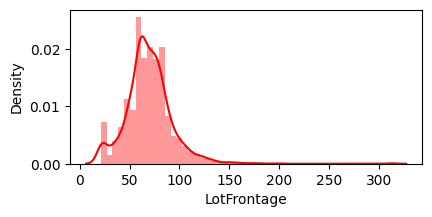

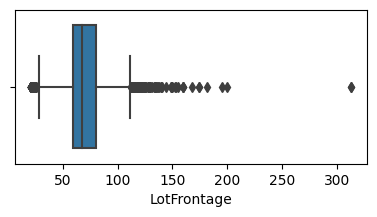

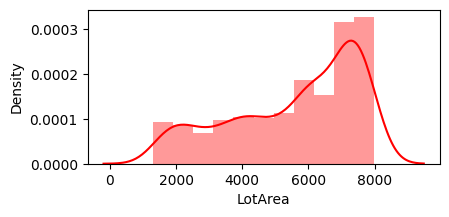

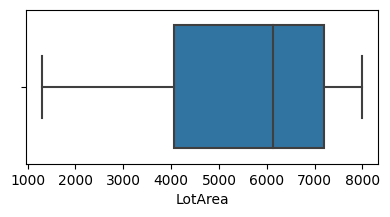

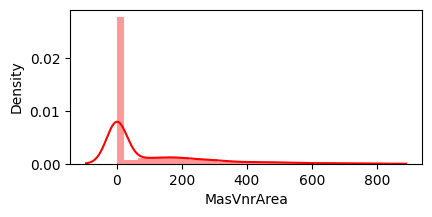

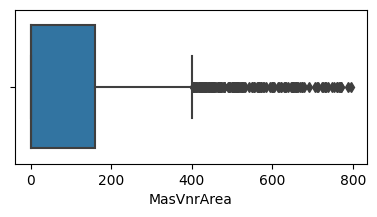

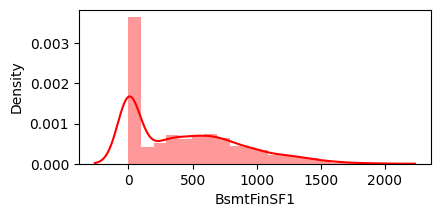

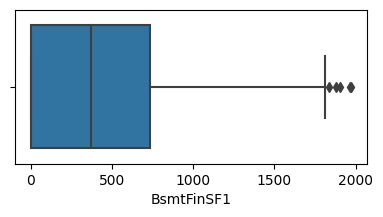

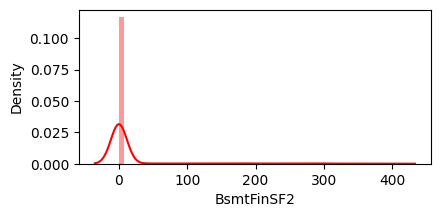

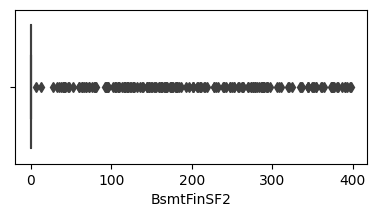

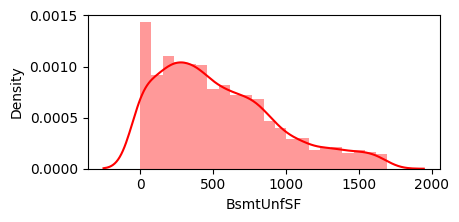

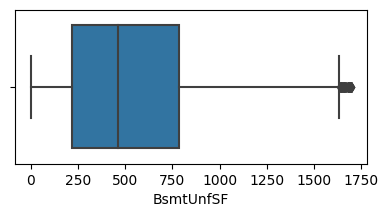

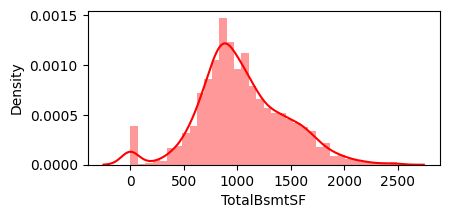

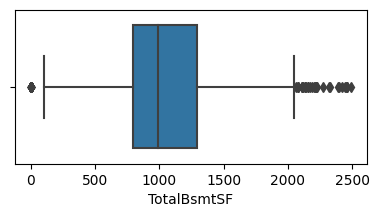

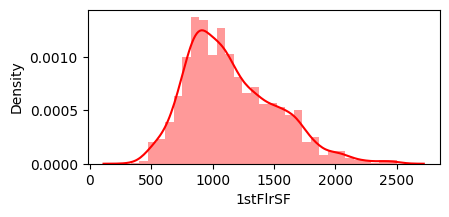

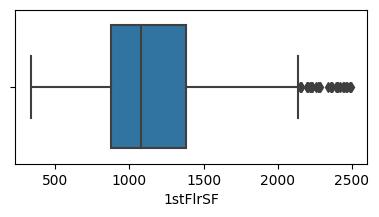

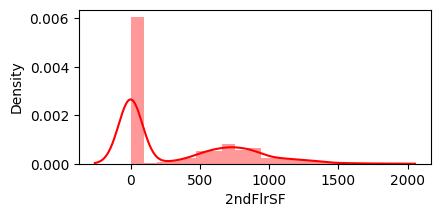

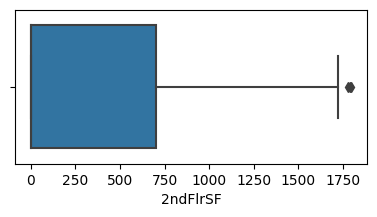

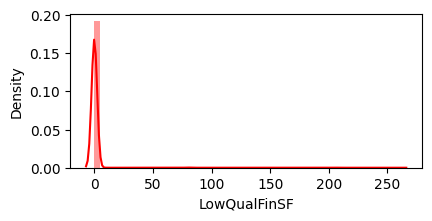

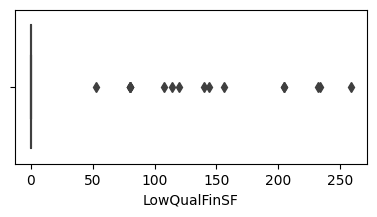

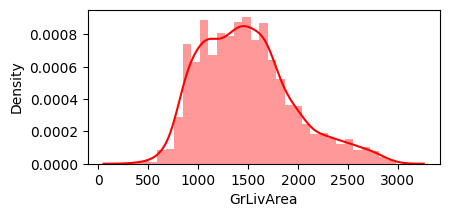

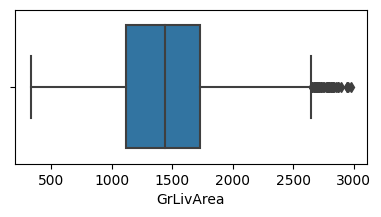

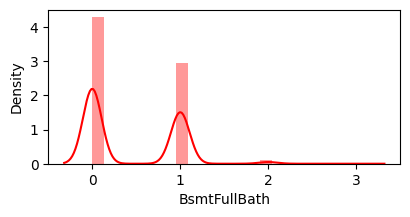

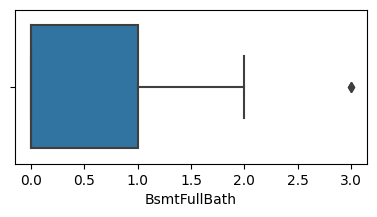

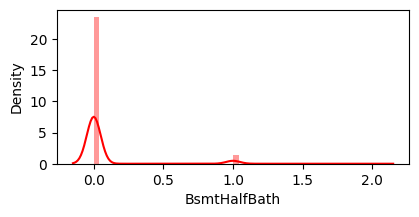

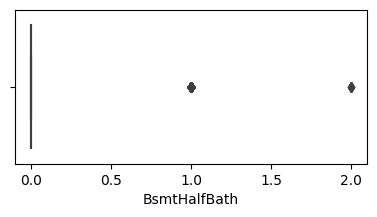

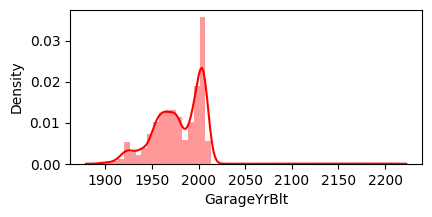

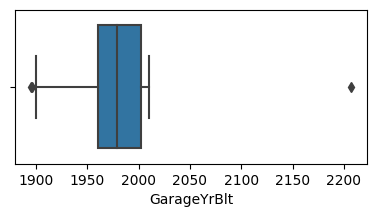

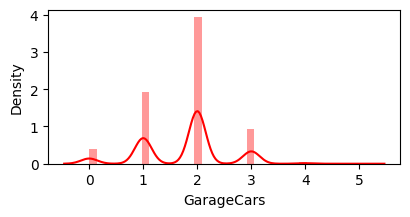

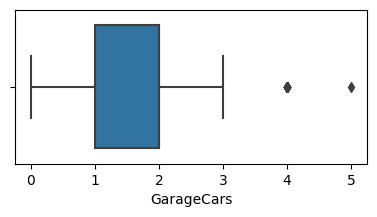

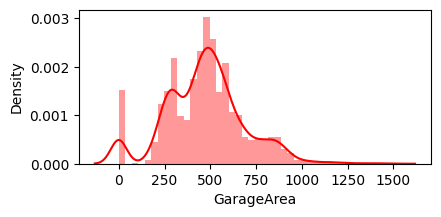

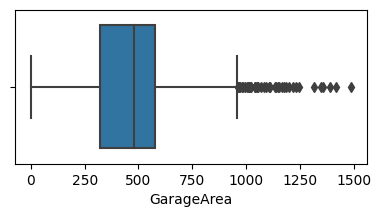

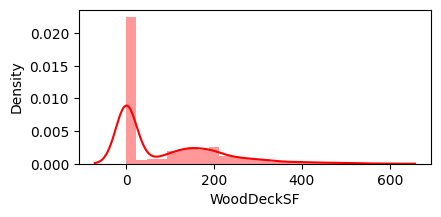

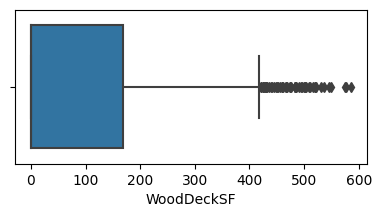

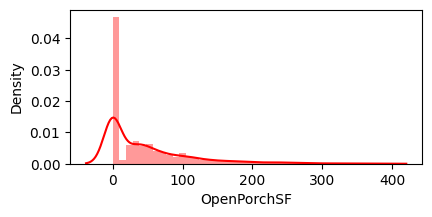

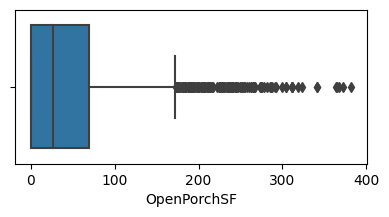

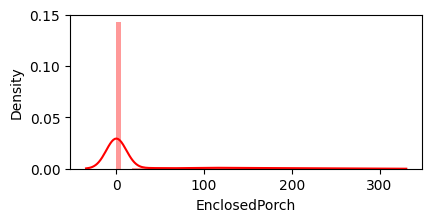

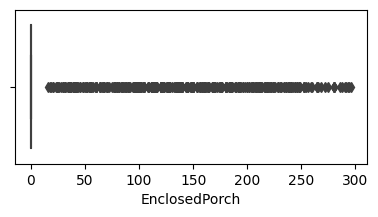

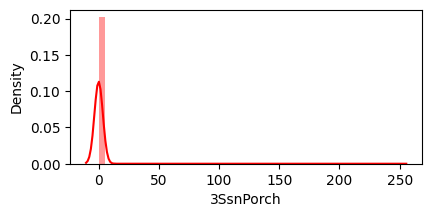

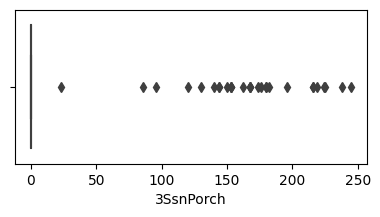

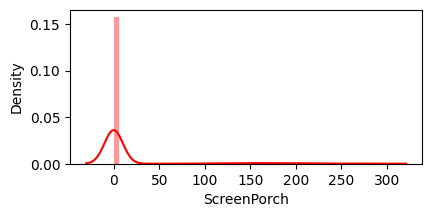

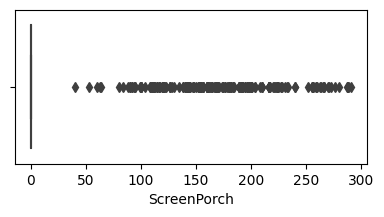

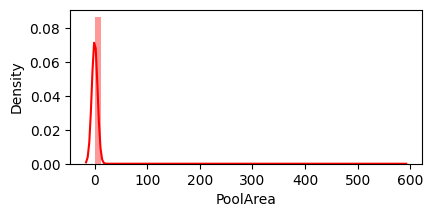

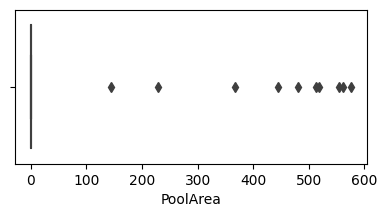

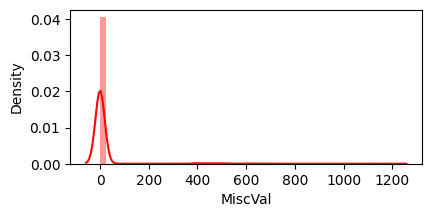

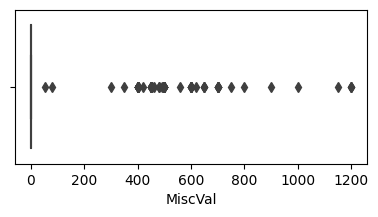

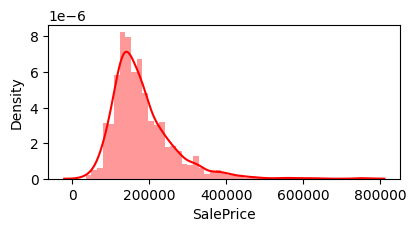

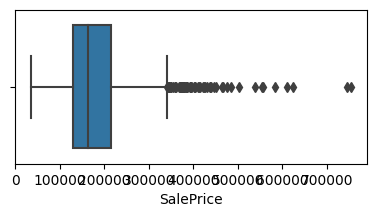

In [61]:
for col in numerical_missing_columns.keys():
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    sb.distplot(df[col],color='r')
    plt.show()

    plt.figure(figsize=(10,2))
    plt.subplot(1,2,2)
    sb.boxplot(x=col,data=df)
    plt.show()

In [62]:
def mean_fill(column):
    mean = df[column].mean()
    df[column].fillna(mean, inplace=True)

In [63]:
def median_fill(column):
    median = df[column].median()
    df[column].fillna(median, inplace=True)

In [64]:
def zero_fill(column):
    zero = 0
    df[column].replace(np.nan, zero, inplace=True)

In [65]:
median_fill('LotFrontage')
median_fill('MasVnrArea')
median_fill('1stFlrSF')
median_fill('LowQualFinSF')
median_fill('WoodDeckSF')
median_fill('OpenPorchSF')
median_fill('EnclosedPorch')
median_fill('3SsnPorch')
median_fill('ScreenPorch')
median_fill('MiscVal')

mean_fill('LotArea')
mean_fill('1stFlrSF')
mean_fill('2ndFlrSF')
mean_fill('GrLivArea')
mean_fill('SalePrice')


zero_fill('BsmtFinSF1')
zero_fill('BsmtFinSF2')
zero_fill('BsmtUnfSF')
zero_fill('TotalBsmtSF')
zero_fill('GarageArea')
zero_fill('GarageYrBlt')
zero_fill('GarageCars')
zero_fill('PoolArea')
zero_fill('BsmtFullBath')
zero_fill('BsmtHalfBath')

In [66]:
df['GarageYrBlt']=df['GarageYrBlt'][df['GarageYrBlt']<2011]

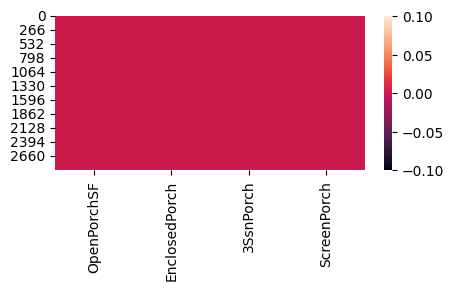

In [67]:
plt.figure(figsize=(5,2))
sb.heatmap(df[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].isnull())
plt.show()

In [68]:
df.isnull().sum().sum()

1

In [69]:
df.to_csv(r'Cleaned_Data')

# Numerical to Categorical Conversion

In [70]:
df_numerical

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [71]:
for i in df_numerical:
    print(i)
    print(df[i].unique())
    print('_'*70)

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
______________________________________________________________________
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  72.  66. 101.
  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52. 100.
  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.  25.
 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126. 200.
 131. 133.]
______________________________________________________________________
LotArea
[5582.94211124 6120.         7420.         7560.         7449.
 4224.         7200.         6324.         7313

In [72]:
num_to_cat = ['MSSubClass','YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold','YrSold']

In [73]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [74]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [75]:
for var in num_to_cat:
    df[var] = df[var].astype(str)

In [76]:
for var in num_to_cat:
    print(var)
    print(df[var].dtype, '\n')

MSSubClass
object 

YearBuilt
object 

YearRemodAdd
object 

GarageYrBlt
object 

MoSold
object 

YrSold
object 



# Ordinal Encoding

In [77]:
for i in df:
    print(i)
    print(df[i].unique())
    print('_'*70)

MSSubClass
['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40' '150']
______________________________________________________________________
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
______________________________________________________________________
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  72.  66. 101.
  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52. 100.
  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.  25.
 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126. 200.
 131. 133.]
_______________________________________________________

In [78]:
ordinal_col = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Functional','GarageFinish','PavedDrive','Utilities']

In [79]:
from pandas.api.types import CategoricalDtype

In [80]:
df['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [81]:
df['OverallQual'] = df['OverallQual'].astype(pd.CategoricalDtype(categories=[1,2,3,4,5,6,7,8,9,10],ordered=True)).cat.codes

In [82]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

In [83]:
df['OverallCond'] = df['OverallCond'].astype(pd.CategoricalDtype(categories=[1,2,3,4,5,6,7,8,9],ordered=True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(pd.CategoricalDtype(categories=['Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(pd.CategoricalDtype(categories=['Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes
df['BsmtQual'] = df['BsmtQual'].astype(pd.CategoricalDtype(categories=['NA','Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes
df['BsmtCond'] = df['BsmtCond'].astype(pd.CategoricalDtype(categories=['NA','Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes
df['BsmtExposure'] = df['BsmtExposure'].astype(pd.CategoricalDtype(categories=['NA','No','Mn','Av','Gd'],ordered=True)).cat.codes

df['BsmtFinType1'] = df['BsmtFinType1'].astype(pd.CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df['BsmtFinType2'] = df['BsmtFinType2'].astype(pd.CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df['HeatingQC'] = df['HeatingQC'].astype(pd.CategoricalDtype(categories=['Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes
df['KitchenQual'] = df['KitchenQual'].astype(pd.CategoricalDtype(categories=['Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes

df['FireplaceQu'] = df['FireplaceQu'].astype(pd.CategoricalDtype(categories=['NA','Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes
df['GarageQual'] = df['GarageQual'].astype(pd.CategoricalDtype(categories=['NA','Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes
df['GarageCond'] = df['GarageCond'].astype(pd.CategoricalDtype(categories=['NA','Po','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes
df['PoolQC'] = df['PoolQC'].astype(pd.CategoricalDtype(categories=['NA','Fa','Ta','Gd','Ex'],ordered=True)).cat.codes

df['Functional'] = df['Functional'].astype(pd.CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True)).cat.codes
df['GarageFinish'] = df['GarageFinish'].astype(pd.CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
df['PavedDrive'] = df['PavedDrive'].astype(pd.CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes
df['Utilities'] = df['Utilities'].astype(pd.CategoricalDtype(categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True)).cat.codes

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int8   
 17  OverallCond    2919 non-null   int8   
 18  YearBuil

In [85]:
object_features = df.select_dtypes(include=object).columns
object_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [86]:
df = pd.get_dummies(df, columns=object_features, prefix=object_features,drop_first=True)

In [87]:
df.shape

(2919, 511)

In [112]:
df.head(2)

LotFrontage      LotArea  Utilities  OverallQual  OverallCond  MasVnrArea   
0         65.0  5582.942111          3            6            4       196.0  \
1         80.0  5582.942111          3            5            7         0.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1   
0          3         -1         4        -1             1             6  \
1         -1         -1         4        -1             4             5   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC   
0       706.0             1         0.0      150.0        856.0          4  \
1       978.0             1         0.0      284.0       1262.0          4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0     856.0     854.0           0.0     1710.0           1.0           0.0  \
1    1262.0       0.0           0.0     1262.0           0.0           1.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   
0         2         1             3             1            3             8  \
1         2         0             3             1           -1             6   

   Functional  Fireplaces  FireplaceQu  GarageFinish  GarageCars  GarageArea   
0           7           0            0             2         2.0       548.0  \
1           7           1           -1             2         2.0       460.0   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch   
0          -1          -1           2         0.0         61.0            0.0  \
1          -1          -1           2       298.0          0.0            0.0   

   3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  SalePrice   
0        0.0          0.0       0.0       0      0.0   208500.0  \
1        0.0          0.0       0.0       0      0.0   181500.0   

   MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190   
0           False           False           False           False  \
1           False           False           False           False   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50   
0          False          False          False          False          False  \
1           True          False          False          False          False   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85   
0           True          False          False          False          False  \
1          False          False          False          False          False   

   MSSubClass_90  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM   
0          False        False        False         True        False  \
1          False        False        False         True        False   

   Street_Pave  Alley_NA  Alley_Pave  LotShape_IR2  LotShape_IR3   
0         True      True       False         False         False  \
1         True      True       False         False         False   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl   
0          True            False            False             True  \
1          True            False            False             True   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside   
0              False          False          False              True  \
1              False           True          False             False   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale   
0          False          False                 False                False  \
1          False          False                 False                False   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr   
0                 False                 False                  True  \
1                 False                 False                 False   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert   
0                 False                 False                 False  \
1      

# Train Test Split

In [88]:
len_train = len(df_train)
len_train

1460

In [89]:
from sklearn.model_selection import train_test_split

X_train = df[:len_train].drop(columns='SalePrice',axis=1)
y_train = df['SalePrice'][:len_train]
X_test  = df[len_train:].drop(columns='SalePrice',axis=1)


# Finding Out Correlation With Target: 'SalePrice'

In [90]:
from scipy.stats import pearsonr

target = 'SalePrice'
correlation_with_target = {}

for col in df:
    if target !=col:
        correlation_with_target[col] = round(pearsonr(df[col],df[target])[0],2)
        
correlation_with_target

{'LotFrontage': 0.24,
 'LotArea': 0.01,
 'Utilities': 0.01,
 'OverallQual': 0.55,
 'OverallCond': -0.06,
 'MasVnrArea': 0.28,
 'ExterQual': 0.45,
 'ExterCond': -0.05,
 'BsmtQual': 0.39,
 'BsmtCond': -0.0,
 'BsmtExposure': 0.26,
 'BsmtFinType1': 0.21,
 'BsmtFinSF1': 0.26,
 'BsmtFinType2': -0.0,
 'BsmtFinSF2': -0.05,
 'BsmtUnfSF': 0.07,
 'TotalBsmtSF': 0.41,
 'HeatingQC': 0.27,
 '1stFlrSF': 0.43,
 '2ndFlrSF': 0.2,
 'LowQualFinSF': -0.04,
 'GrLivArea': 0.46,
 'BsmtFullBath': 0.16,
 'BsmtHalfBath': -0.01,
 'FullBath': 0.39,
 'HalfBath': 0.2,
 'BedroomAbvGr': 0.12,
 'KitchenAbvGr': -0.1,
 'KitchenQual': 0.42,
 'TotRmsAbvGrd': 0.39,
 'Functional': 0.08,
 'Fireplaces': 0.33,
 'FireplaceQu': 0.24,
 'GarageFinish': 0.39,
 'GarageCars': 0.44,
 'GarageArea': 0.44,
 'GarageQual': -0.09,
 'GarageCond': -0.14,
 'PavedDrive': 0.15,
 'WoodDeckSF': 0.23,
 'OpenPorchSF': 0.23,
 'EnclosedPorch': -0.11,
 '3SsnPorch': 0.03,
 'ScreenPorch': 0.05,
 'PoolArea': 0.08,
 'PoolQC': 0.09,
 'MiscVal': -0.05,
 'MSSu

# Finding Out almost 0% correlation

In [91]:
zero_correlation_col = [var for var in correlation_with_target if (correlation_with_target[var] < 0.1) & (correlation_with_target[var] > -0.1)]

print(len(zero_correlation_col))
zero_correlation_col

428


['LotArea',
 'Utilities',
 'OverallCond',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'Functional',
 'GarageQual',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RH',
 'Street_Pave',
 'Alley_NA',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Gilbert',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_SWISU',
 

In [92]:
X_train.drop(columns = zero_correlation_col,axis=1,inplace=True)

In [93]:
X_test.drop(columns=zero_correlation_col,axis=1,inplace=True)

In [94]:
X_train.shape

(1460, 82)

In [95]:
X_test.shape

(1459, 82)

# Finding Features More Than 90% Correlation

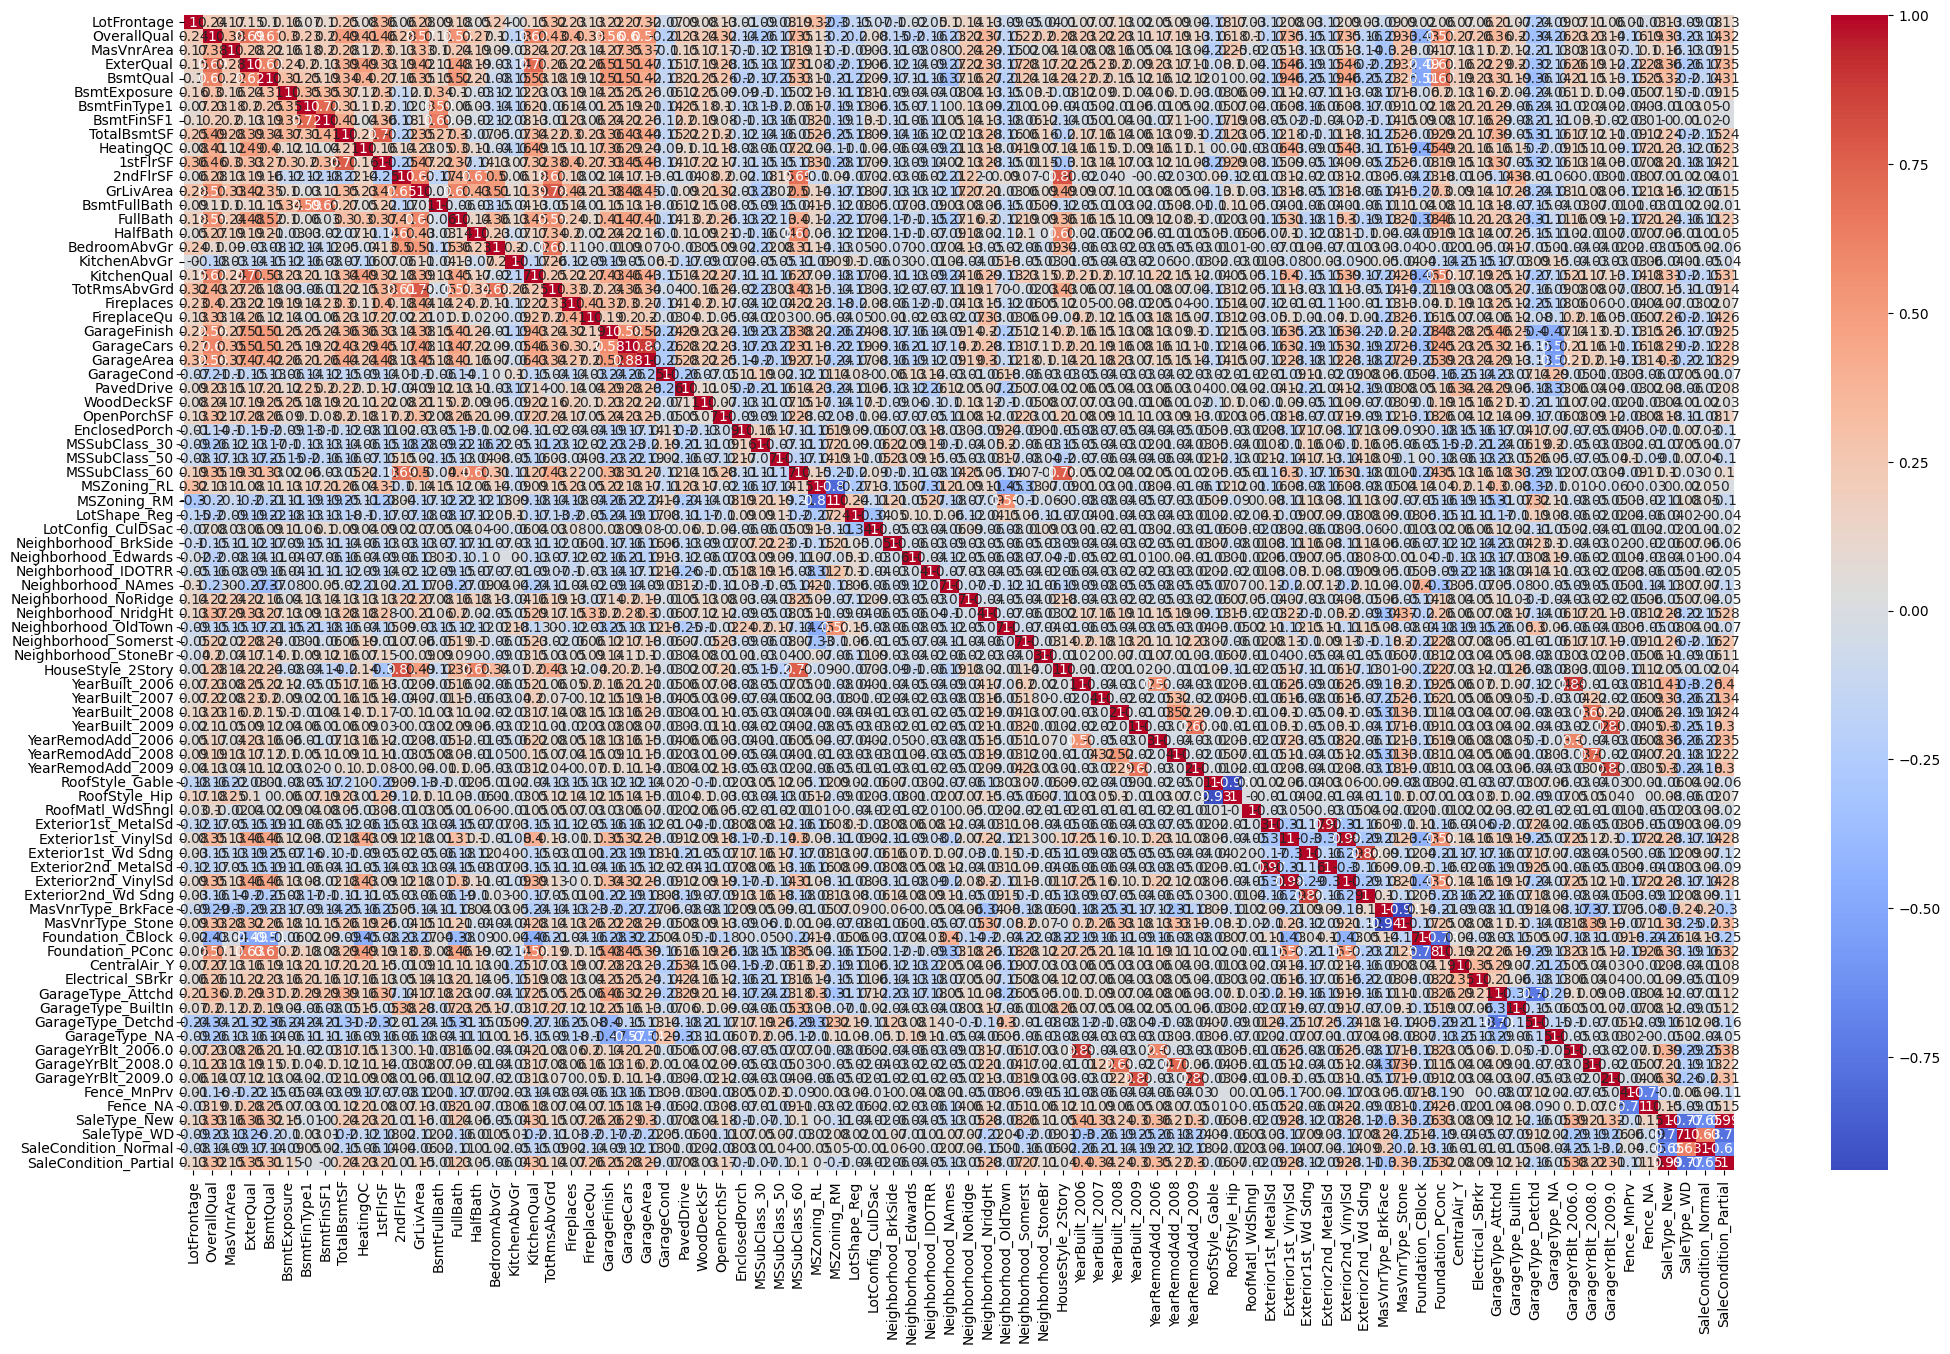

In [96]:
plt.figure(figsize=(25,15))
sb.heatmap(round(X_train.corr(),2),annot=True,cmap='coolwarm')
plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
def large_correlation(data, threshold):
    set_of_all_corr = set()
    corr_matrix = X_train.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                set_of_all_corr.add(corr_matrix.columns[i])
    
    return set_of_all_corr

In [98]:
highly_corr_features = large_correlation(X_train,0.9)
print(len(highly_corr_features))
highly_corr_features

3


{60, 61, 81}

In [99]:
X_train.head(2)

0         1         2         3         4         5         6    
0 -0.212720  0.651479  0.670534  1.244949  0.900782 -0.590555  1.164712  \
1  0.468158 -0.071836 -0.605799 -0.774635  0.900782  2.220999  0.690115   

         7         8         9         10        11        12        13   
0  0.631752 -0.456057  0.791634 -0.826585  1.185315  0.476938  1.107810  \
1  1.266519  0.544499  0.791634  0.303393 -0.798482 -0.490031 -0.819964   

         14        15        16        17        18        19        20   
0  0.789741  1.227585  0.163779 -0.211454  0.971123  0.912210 -0.951226  \
1  0.789741 -0.761621  0.163779 -0.211454 -0.972454 -0.318683  0.600495   

         21        22        23        24        25        26        27   
0 -0.486515  0.318475  0.311725  0.351000 -0.258738  0.289745 -0.768412  \
1 -0.989213  0.318475  0.311725 -0.060731 -0.258738  0.289745  1.739564   

         28        29        30        31        32        33        34   
0  0.260062 -0.361241 -0.222721 -0.330791  1.970518  0.518133 -0.418955  \
1 -0.738178 -0.361241 -0.222721 -0.330791 -0.507481  0.518133 -0.418955   

         35        36        37        38       39        40        41   
0  0.760512 -0.262324 -0.203395 -0.271163 -0.16125 -0.426833 -0.169981  \
1  0.760512 -0.262324 -0.203395 -0.271163 -0.16125 -0.426833 -0.169981   

         42        43        44        45        46        47        48   
0 -0.235958 -0.289638 -0.250182 -0.131991  1.510265 -0.219312 -0.186352  \
1 -0.235958 -0.289638 -0.250182 -0.131991 -0.662136 -0.219312 -0.186352   

         49        50        51        52        53        54       55   
0 -0.126513 -0.111726 -0.266771 -0.167836 -0.126513  0.528753 -0.49357  \
1 -0.126513 -0.111726 -0.266771 -0.167836 -0.126513  0.528753 -0.49357   

         56        57        58        59        60        61       62   
0 -0.064238 -0.421212  1.354604 -0.405308 -0.414427  1.377253 -0.39494  \
1 -0.064238  2.374103 -0.738223 -0.405308  2.412971 -0.726083 -0.39494   

         63        64        65        66        67        68        69   
0  0.329515 -0.309994 -0.876102  1.120968  0.263813  0.305995  0.823505  \
1  0.329515 -0.309994  1.141420 -0.892086  0.263813  0.305995  0.823505   

         70        71       72        73        74        75        76   
0 -0.253259 -0.600559 -0.24236 -0.205214 -0.142357 -0.120803 -0.347118  \
1 -0.253259 -0.600559 -0.24236 -0.205214 -0.142357 -0.120803 -0.347118   

         77        78        79        80        81  
0  0.488198 -0.301962  0.390293  0.467651 -0.305995  
1  0.488198 -0.301962  0.390293  0.467651 -0.305995

In [100]:

X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))


In [101]:
X_train.drop(columns=[60, 61, 81],axis=1,inplace=True)

In [102]:
X_test.drop(columns=[60, 61, 81],axis=1,inplace=True)

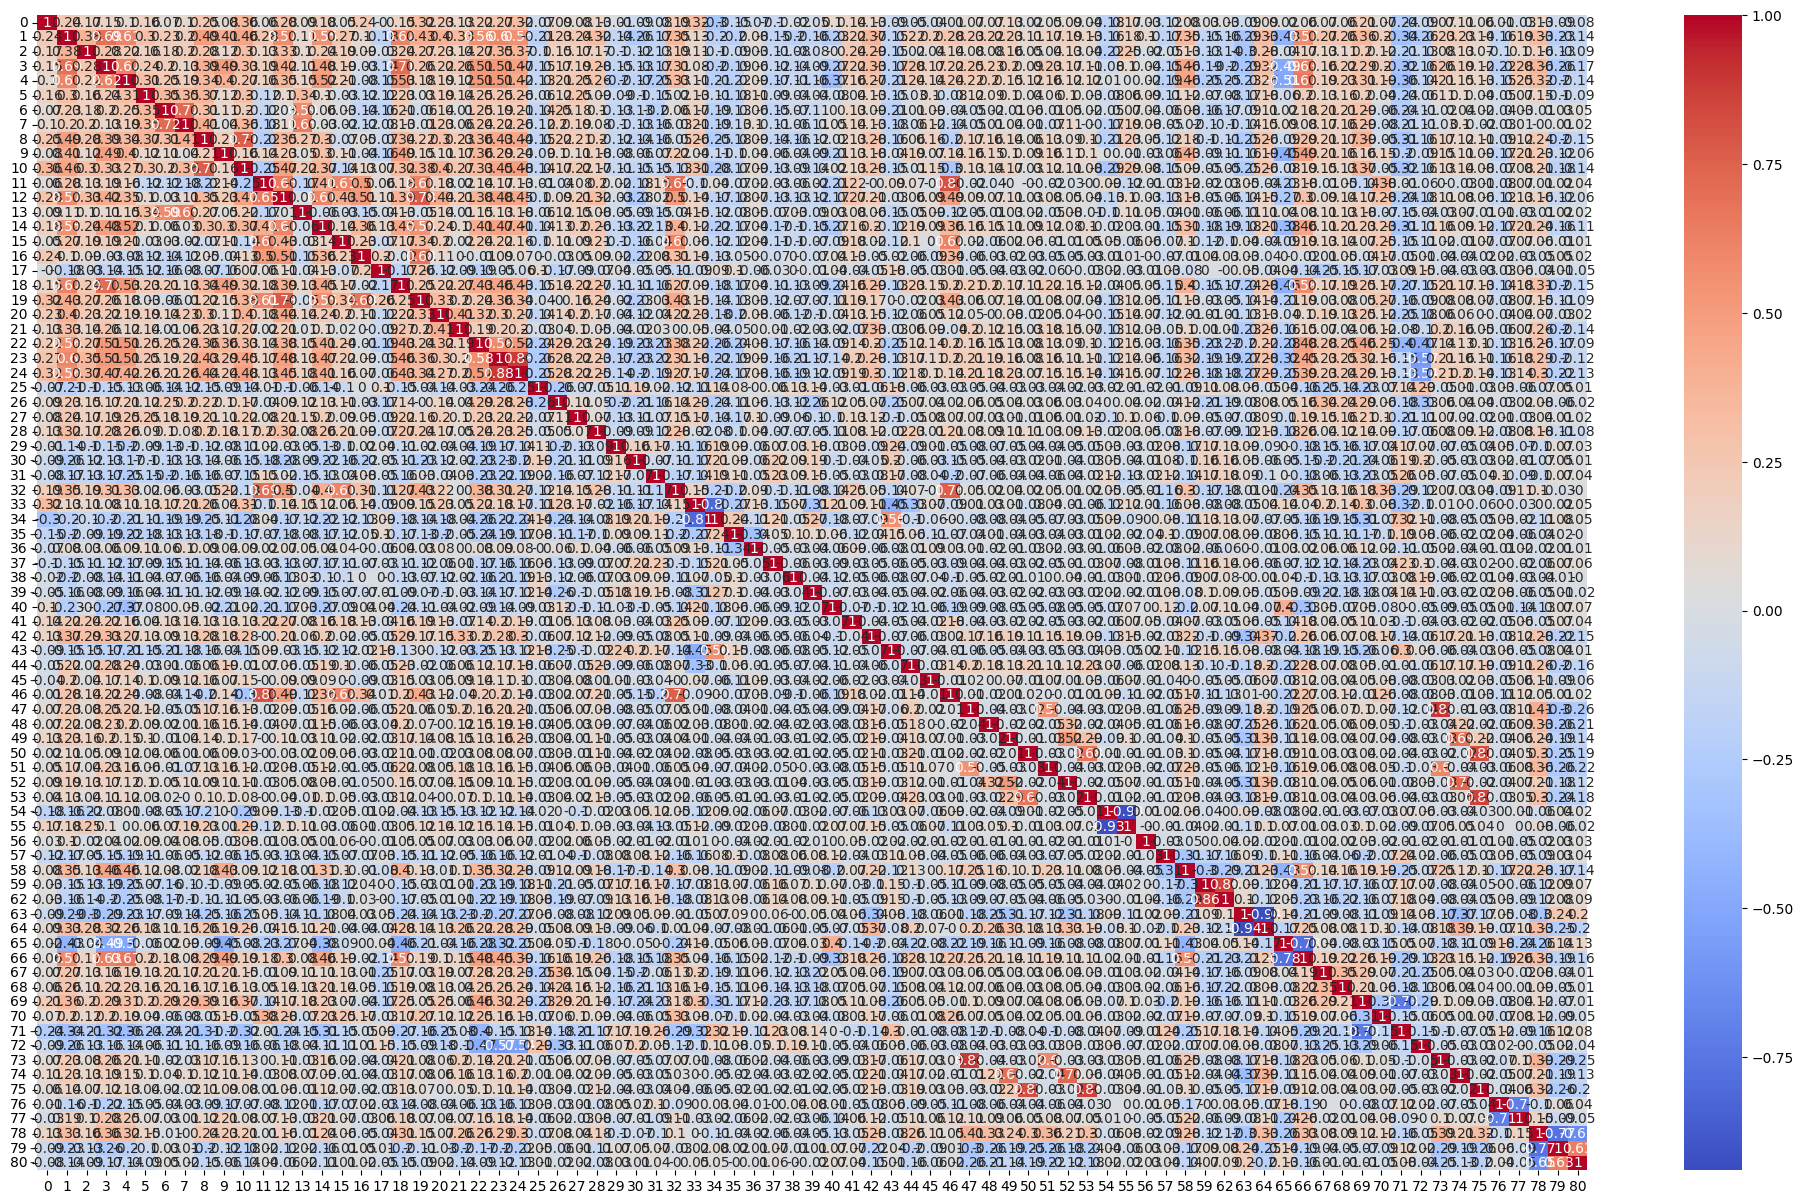

In [103]:
plt.figure(figsize=(25,15))
sb.heatmap(round(X_train.corr(),2),annot=True,cmap='coolwarm')
plt.show()

# Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test  = sc.transform(X_test)

# Machine Learning Model Training

In [105]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [106]:
svr  = SVR()
lr   = LinearRegression()
sgdr = SGDRegressor()
knn  = KNeighborsRegressor()
gr   = GaussianProcessRegressor()
dt   = DecisionTreeRegressor()
gbr  = GradientBoostingRegressor()
rf   = RandomForestRegressor()
iso  = IsotonicRegression()
mlpr = MLPRegressor()
xgb  = XGBRegressor()

In [107]:
models = {
        'a'  : ['SVR', svr],
        'b'  : ['LinearRegression',lr],
        'c'  : ['SGDRegressor',sgdr],
        'd'  : ['KNeighborsRegressor',knn],
        'e'  : ['GaussianProcessRegressor',gr],
        'f'  : ['DecisionTreeRegressor',dt],
        'g'  : ['GradientBoostingRegressor',gbr],
        'h'  : ['RandomForestRegressor',rf],
        #'i'  : ['IsotonicRegression',iso],
        'i'  : ['MLPRegressor',mlpr],
        'j'  : ['XGBRegressor',xgb]

}

# Cross Validation

In [108]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train = X_train, y_train = y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv = cv)
    score = [r2_val_score.mean()]
    return score

In [109]:
models_score = []

for var in models:
    print("Training Model : ", models[var][0])
    score = test_model(models[var][1], X_train, y_train)
    print("Score of Model :", score)
    models_score.append([models[var][0], score[0]])

Training Model :  SVR
Score of Model : [-0.05313957373932197]
Training Model :  LinearRegression
Score of Model : [0.8306817586934571]
Training Model :  SGDRegressor
Score of Model : [0.8227245456567862]
Training Model :  KNeighborsRegressor
Score of Model : [0.719885855485033]
Training Model :  GaussianProcessRegressor
Score of Model : [-5.079802846031072]
Training Model :  DecisionTreeRegressor
Score of Model : [0.703336743461965]
Training Model :  GradientBoostingRegressor
Score of Model : [0.8764546465783468]
Training Model :  RandomForestRegressor
Score of Model : [0.8575326884183984]
Training Model :  MLPRegressor
Score of Model : [-5.038182127923698]
Training Model :  XGBRegressor
Score of Model : [0.8607144590872288]


# Finding Errors will not be possible because y_test is null

svr_fit = svr.fit(X_train, y_train)
svr_pred = svr_fit.predict(X_test)

lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)

sgdr_fit = sgdr.fit(X_train, y_train)
sgdr_pred = sgdr_fit.predict(X_test)

knn_fit = knn.fit(X_train, y_train)
knn_pred = knn_fit.predict(X_test)

gr_fit = gr.fit(X_train, y_train)
gr_pred = gr_fit.predict(X_test)

dt_fit = dt.fit(X_train, y_train)
dt_pred = dt_fit.predict(X_test)

gbr_fit = gbr.fit(X_train, y_train)
gbr_pred = gbr_fit.predict(X_test)

rf_fit = rf.fit(X_train, y_train)
rf_pred = rf_fit.predict(X_test)

mlpr_fit = mlpr.fit(X_train, y_train)
mlpr_pred = mlpr_fit.predict(X_test)

#iso_fit = iso.fit(X_train, y_train)
#iso_pred = iso_fit.predict(X_test)

xgb_fit = xgb.fit(X_train, y_train)
xgb_pred = xgb_fit.predict(X_test)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def get_metrics(y_test, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    print(model_name)
    print('MSE',MSE)
    print('RMSE',RMSE)
    print('MAE',MAE)
    print('R2',R2)
    print('\n')

get_metrics(y_test, svr_pred, 'Support Vector Regression\n')
get_metrics(y_test, lr_pred, 'Linear Regression\n')
get_metrics(y_test, sgdr_pred, 'SGD Regression\n')
get_metrics(y_test, knn_pred, 'K Nearest Neibors Regression\n')
get_metrics(y_test, gr_pred, 'Gaussian Process\n')
get_metrics(y_test, dt_pred, 'Decision Tree Regression\n')

get_metrics(y_test, gbr_pred, 'Gradient Boosting Regression\n')
get_metrics(y_test, rf_pred, 'Random Forest Regression\n')
get_metrics(y_test, mlpr_pred, 'MLP Regressor\n')
get_metrics(y_test, xgb_pred, 'XG Boost Regression\n')

# Hyper Parameter Tuning

In [111]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV

params = {
    'loss'               : ['squared_error','absolute_error'],
    'learning_rate'      : [0.1, 0.9],
    'n_estimators'       : [100,500],
#'subsample'          : 1.0,
    'criterion'          : ['friedman_mse', 'squared_error'],
    'min_samples_split'  : [2,8],
#'min_samples_leaf'   : 1,
#min_weight_fraction_leaf=0.0,
#'max_depth'          : 3,
#min_impurity_decrease=0.0,
#init=None,
#'random_state'       : None,
#'max_features'       : None,
    'alpha'              : [0.1,0.9],
#'verbose'            : 0,
#'max_leaf_nodes'     : None,
#'warm_start'         : False,
#'validation_fraction': 0.1,
#'n_iter_no_change'   : None,
#'tol'                : 0.0001,
    'ccp_alpha'          : [0.0,0.5]
}


rs_cv = RandomizedSearchCV(estimator = GradientBoostingRegressor(),
                           param_distributions = params,
                           n_iter = 100,
                           cv = 5,
                           verbose = 1,
                           random_state = 100)
                          

In [ ]:
rs_cv.fit(X_train, y_train)
y_pred_rs_cv = rs_cv.predict(X_test)

print('\nBest Parameters : \n', rs_cv.best_params_)
score = rs_cv.best_score_
print('\nBest Score : \n', score)

'n_estimators': 500, 'min_samples_split': 2, 'loss': 'squared_error', 'learning_rate': 0.1, 'criterion': 'squared_error', 'ccp_alpha': 0.5, 'alpha': 0.9

In [ ]:
gbr = GradientBoostingRegressor(
            n_estimators       = 500, 
            min_samples_split  = 2, 
            loss               = 'squared_error', 
            learning_rate      = 0.1, 
            criterion          = 'squared_error', 
            ccp_alpha          = 0.5, 
            alpha              = 0.9
)


gbr.fit(X_train,y_train)

In [ ]:
gbr_pred = gbr.predict(X_test)
gbr_pred

In [ ]:
y_test = gbr_pred
y_test

In [ ]:
y_test.shape

# Save Model

In [ ]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(gbr)
  
# Load the pickled model
gradiant_boosting_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
gradiant_boosting_pickle.predict(X_test)


In [ ]:
from joblib import Parallel, delayed
import joblib
  
#save model
joblib.dump(gbr, 'gradiant_boosting.pkl')
  
# Load the model from the file
gradiant_boosting_joblib = joblib.load('gradiant_boosting.pkl')
  
# Use the loaded model to make predictions
gradiant_boosting_joblib.predict(X_test)